# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.1B: Round Robin

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

In [3]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

We have seen in the previous exercise that a greedy policy can lock into sub-optimal action. Could it be worse than a simple round-robin selection?

Let's implement a round robin policy: that is "pulling" the arms in round robin fashion. So for example, if you have three arms, the sequence will be arm 1, arm 2, arm 3 and then back to arm 1, and so on, until the trials finishes. 

We have given you some boiler plate code, you only need to modify the part as indicated.

In [4]:
class RoundRobin(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Round Robin"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.previous_action = 0 #keep track of previous action
    
    def act(self):
        """Implement Round Robin here"""
                
        if self.previous_action < (num_actions - 1):
            current_action = self.previous_action + 1
            self.previous_action = current_action
        else:
            current_action = 0
            self.previous_action = current_action

        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1    

Now let's run the same simulation and keep the parameters as the previous exercise.

In [5]:
evaluation_seed = 8026
num_actions = 5
trials = 10000
distribution = "bernoulli"

Distribution: bernoulli [0.4561754  0.22507755 0.82070893 0.05221751 0.03428511]
Optimal arm: 2


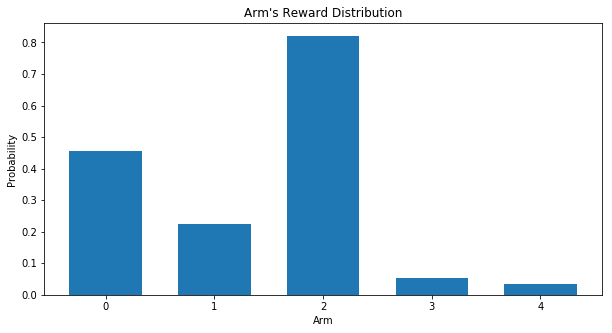

--------------------------------------------------
Policy: Round Robin 
Average Reward: 0.3206 
Average Regret: 0.5030160284732659
Arm pulls: [2000. 2000. 2000. 2000. 2000.]


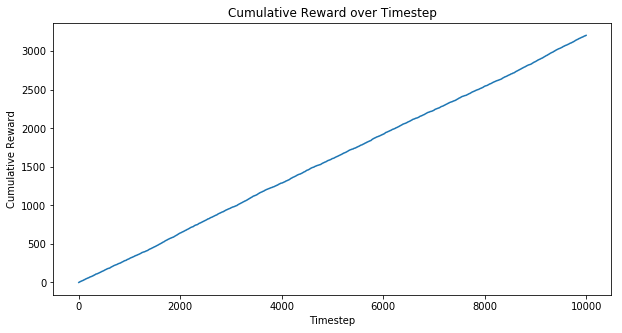

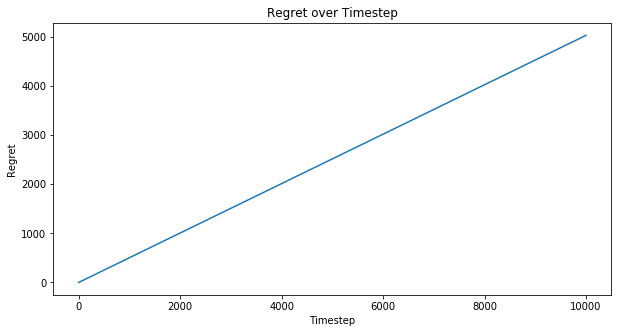

In [6]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = RoundRobin(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Observe the above results. Did the round-robin beat the greedy algorithm in this case?


Once you have answered the questions in this lab, play around with different evaluation_seed and/or num_actions. Essentially creating a different version of the BanditEnv environment. Run the simulation and observe the results.
